# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Data Preprocessing

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv') 
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:


df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [5]:
df.shape

(962, 2)

# Exploring the categories in the dataset

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

# Encoding the categories using LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

cat_unique= df['Category'].unique()

cat_enc_unique = df['Category_encoded'].unique()

type(cat_unique)

unqsize = cat_unique.size

for i in range(unqsize):
    print(cat_unique[i], cat_enc_unique[i])

Data Science 6
HR 12
Advocate 0
Arts 1
Web Designing 24
Mechanical Engineer 16
Sales 22
Health and fitness 14
Civil Engineer 5
Java Developer 15
Business Analyst 4
SAP Developer 21
Automation Testing 2
Electrical Engineering 11
Operations Manager 18
Python Developer 20
DevOps Engineer 8
Network Security Engineer 17
PMO 19
Database 7
Hadoop 13
ETL Developer 10
DotNet Developer 9
Blockchain 3
Testing 23


In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [9]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

counts
labels


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

# Cleaning the resume by removing hashtags, urls, symbols etc., using Regular Expression

In [10]:

import re #regular expression
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [11]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [14]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization using TF-IDF Vectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [16]:
df.Resume

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

# Train - Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [18]:
X_train.shape

(769, 7351)

In [19]:
X_test.shape

(193, 7351)

# Training the model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [21]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

# Saving the models using pickle

In [22]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


# Read PDF resume, extract text content.

In [23]:
import pdfplumber

def extract_text_from_pdf(pdf_file_path):
    text = ""
    with pdfplumber.open(pdf_file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text


pdf_file_path = "./testResumes/cv3.pdf"
myresume_pdf = extract_text_from_pdf(pdf_file_path)

# Job Role Prediction and Scoring the resume

In [24]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Train the classifier
classifier = OneVsRestClassifier(SVC(probability=True))
classifier.fit(X_train, y_train)

# Save the trained classifier and TfidfVectorizer
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))
pickle.dump(classifier, open('classifier.pkl', 'wb'))

# Load the trained classifier
loaded_classifier = pickle.load(open('classifier.pkl', 'rb'))

# Clean the input resume
# cleaned_resume = cleanResume(myresume)
cleaned_resume = cleanResume(myresume_pdf)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
predicted_category_id = loaded_classifier.predict(input_features)[0]

# Get the probabilities of each class
probabilities = loaded_classifier.predict_proba(input_features)[0]

# Find the probability of the predicted class
predicted_category_probability = probabilities[predicted_category_id]

# Convert the probability to a scale of 1 to 100
strength = predicted_category_probability * 100

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Analyst",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

predicted_category_name = category_mapping.get(predicted_category_id, "Unknown")

score = strength
if score<50:
    score+=45
elif score>50 and score<75:
    score+=15
else:
    score+=0

print("Predicted Category: \n", predicted_category_name)
print("Strength of Resume for Predicted Category (scale 1-100): \n", score)




Predicted Category: 
 Python Developer
Strength of Resume for Predicted Category (scale 1-100): 
 85.0394689813728


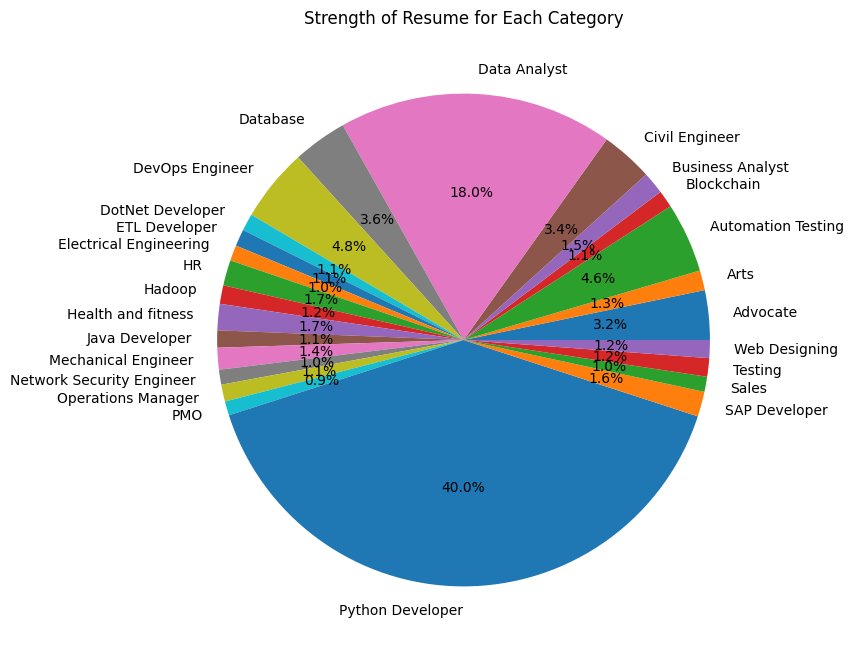

In [25]:
import matplotlib.pyplot as plt

# Get the probabilities of each class
probabilities = loaded_classifier.predict_proba(input_features)[0]

# Convert the probabilities to a scale of 1 to 100
strengths = probabilities * 100

# Create a mapping of category names to strengths
category_strengths = {category_mapping[i]: strength for i, strength in enumerate(strengths)}

plt.figure(figsize=(10, 8))
plt.pie(category_strengths.values(), labels=category_strengths.keys(), autopct='%1.1f%%')
plt.title('Strength of Resume for Each Category')
plt.show()

# Assuming category_strengths is a dictionary or DataFrame




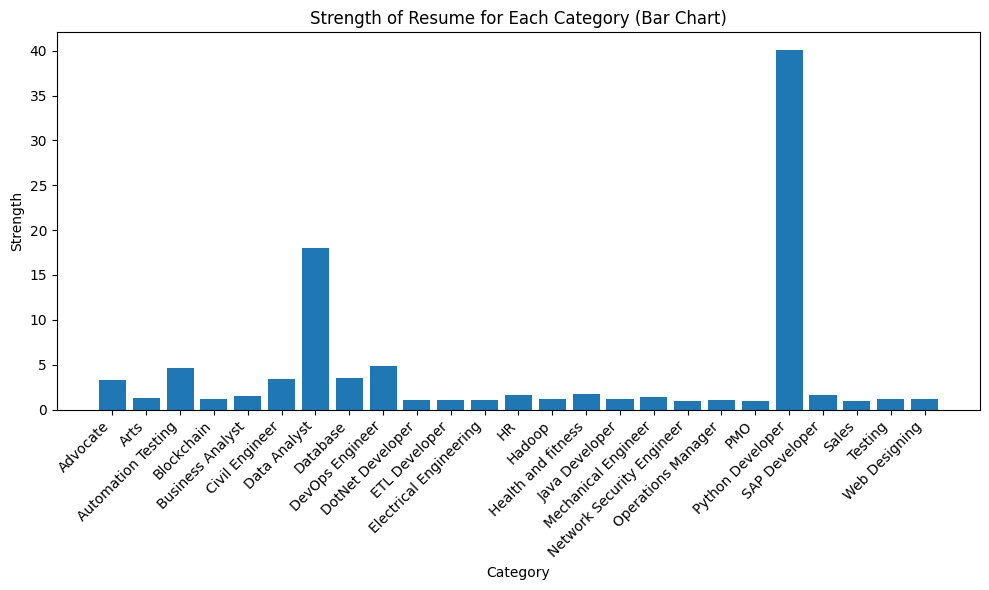

In [26]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(category_strengths.keys(), category_strengths.values())  # Create bar chart
plt.xlabel('Category')  # Label for x-axis
plt.ylabel('Strength')  # Label for y-axis
plt.title('Strength of Resume for Each Category (Bar Chart)')  # Plot title
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.tight_layout()  # Adjust spacing for better visualization
plt.show()


# Analyzing the company dataset

In [27]:
comp_dt = pd.read_csv("company_data_set.csv")
comp_dt.head()

,Company,Category,Scale
0,Apple,Java Developer,80
1,Apple,Testing,70
2,Apple,DevOps Engineer,75
3,Apple,Python Developer,80
4,Apple,Web Designing,70


# Displaying the eligible companies

In [32]:
def find_companies(predicted_category_name_input, score_input):
    filtered_companies = comp_dt[(comp_dt['Category'] == predicted_category_name_input) & (comp_dt['Scale'] <= score_input)]
    company_names = filtered_companies['Company'].tolist()
    
    return company_names


matching_companies = find_companies(predicted_category_name, score)

print("Based on the qualifications and experience outlined in \nthis individual's resume, it is improbable that they would \nmeet the criteria necessary for successful candidacy at the \nfollowing companies: \n")


for i in matching_companies:
    print(i)


Based on the qualifications and experience outlined in 
this individual's resume, it is improbable that they would 
meet the criteria necessary for successful candidacy at the 
following companies: 

Apple
Facebook
Netflix
IBM
Samsung
Intel
Oracle
Cisco
Uber
Airbnb
Adobe
NVIDIA
Amazon
MicroSoft
HP


# Displaying the ineligible companies

In [35]:
def find_ineligible_companies(predicted_category_name_input, score_input):
    filtered_companies = comp_dt[(comp_dt['Category'] == predicted_category_name_input) & (comp_dt['Scale'] > score_input)]
    company_names = filtered_companies['Company'].tolist()
    
    return company_names


ineligible_companies = find_ineligible_companies(predicted_category_name, score)

print("Based on the qualifications and experience outlined in \nthis individual's resume, it is improbable that they would \nmeet the criteria necessary for successful candidacy at the \nfollowing companies: \n")

for i in ineligible_companies:
    print(i)

Based on the qualifications and experience outlined in 
this individual's resume, it is improbable that they would 
meet the criteria necessary for successful candidacy at the 
following companies: 

Tesla
Google
